In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
col_names = cancer.feature_names
target_names = cancer.target_names

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
bcc = pd.DataFrame(x, columns=col_names)
print(bcc)
print(y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(bcc, y, test_size=0.15, stratify=y, random_state=2021)


In [5]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3, stratify=y_train, random_state=2021)


In [6]:
#인덱스 초기화

x_train.reset_index(drop=True)
x_test.reset_index(drop=True)
x_valid.reset_index(drop=True)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
1,14.450,20.22,94.49,642.7,0.09872,0.12060,0.11800,0.05980,0.1950,0.06466,...,18.33,30.12,117.90,1044.0,0.1552,0.4056,0.4967,0.18380,0.4753,0.10130
2,18.770,21.43,122.90,1092.0,0.09116,0.14020,0.10600,0.06090,0.1953,0.06083,...,24.54,34.37,161.10,1873.0,0.1498,0.4827,0.4634,0.20480,0.3679,0.09870
3,12.680,23.84,82.69,499.0,0.11220,0.12620,0.11280,0.06873,0.1905,0.06590,...,17.09,33.47,111.80,888.3,0.1851,0.4061,0.4024,0.17160,0.3383,0.10310
4,14.860,16.94,94.89,673.7,0.08924,0.07074,0.03346,0.02877,0.1573,0.05703,...,16.31,20.54,102.30,777.5,0.1218,0.1550,0.1220,0.07971,0.2525,0.06827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,0.07818,...,7.93,19.54,50.41,185.2,0.1584,0.1202,0.0000,0.00000,0.2932,0.09382
141,12.390,17.48,80.64,462.9,0.10420,0.12970,0.05892,0.02880,0.1779,0.06588,...,14.18,23.13,95.23,600.5,0.1427,0.3593,0.3206,0.09804,0.2819,0.11180
142,12.830,22.33,85.26,503.2,0.10880,0.17990,0.16950,0.06861,0.2123,0.07254,...,15.20,30.15,105.30,706.0,0.1777,0.5343,0.6282,0.19770,0.3407,0.12430
143,14.200,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,...,16.45,27.26,112.10,828.5,0.1153,0.3429,0.2512,0.13390,0.2534,0.07858


In [8]:
# 표준화
# train, valid, test 모든 컬럼 각각표준화 스케일링
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(x_train)
sc.fit(x_valid)
sc.fit(x_test)

x_train_sc = sc.transform(x_train)
x_valid_sc = sc.transform(x_valid)
x_test_sc = sc.transform(x_test)

In [9]:
#knn 학습
from sklearn.neighbors import KNeighborsClassifier

knns = []
for i in range(2,16):
    classifier = KNeighborsClassifier(n_neighbors=i, weights = 'uniform')
    knns.append(classifier.fit(x_train_sc,y_train))
print(knns)


[KNeighborsClassifier(n_neighbors=2), KNeighborsClassifier(n_neighbors=3), KNeighborsClassifier(n_neighbors=4), KNeighborsClassifier(), KNeighborsClassifier(n_neighbors=6), KNeighborsClassifier(n_neighbors=7), KNeighborsClassifier(n_neighbors=8), KNeighborsClassifier(n_neighbors=9), KNeighborsClassifier(n_neighbors=10), KNeighborsClassifier(n_neighbors=11), KNeighborsClassifier(n_neighbors=12), KNeighborsClassifier(n_neighbors=13), KNeighborsClassifier(n_neighbors=14), KNeighborsClassifier(n_neighbors=15)]


In [10]:
#knn 모델 성능(valid) 리스트 담고 acc 선언

accs = []
for c in knns:
    accs.append(c.score(x_valid_sc, y_valid))
print(accs)

[0.9586206896551724, 0.9586206896551724, 0.9586206896551724, 0.9586206896551724, 0.9586206896551724, 0.9655172413793104, 0.9586206896551724, 0.9586206896551724, 0.9586206896551724, 0.9655172413793104, 0.9655172413793104, 0.9586206896551724, 0.9448275862068966, 0.9379310344827586]


5 0.9655172413793104


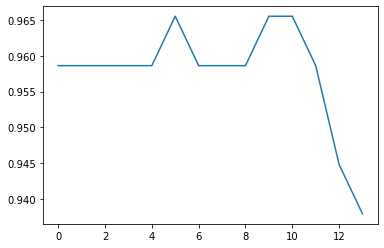

In [14]:
#knn 모델 k에 따른 acc 시각화, 가장좋은값 선택
plt.plot(accs)
print(accs.index(max(accs)), max(accs))

In [21]:
#knn 모델성능(test) acc 출력
acct = [] # test셋의 정확도
for c in knns :
    acct.append(c.score(x_test_sc, y_test))
best = acct.index(max(acct))
print('best_idx:', acct.index(max(acct)), '  best_acc:', max(acct))

best_idx: 3   best_acc: 0.9883720930232558


In [22]:
#해당 모델 classification report 출력
#malignant의 precision 값 출력

from sklearn.metrics import classification_report

print(classification_report(y_test,knns[best].predict(x_test_sc), target_names=['malignant', 'precision']))


              precision    recall  f1-score   support

   malignant       1.00      0.97      0.98        32
   precision       0.98      1.00      0.99        54

    accuracy                           0.99        86
   macro avg       0.99      0.98      0.99        86
weighted avg       0.99      0.99      0.99        86



In [23]:
#Q13. Q8에서 Q11까지의 학습과정을 scaling 되지 않은 원본데이터로 학습
knns = []
for i in range(2, 16):
    classifier = KNeighborsClassifier(n_neighbors = i, weights = 'uniform')
    knns.append(classifier.fit(x_train, y_train))
print(knns)

accs = []
for c in knns :
    accs.append(c.score(x_test, y_test))
print(accs)

best_k = accs.index(max(accs)) 
print(accs[best_k], best_k)

print(classification_report(y_valid, knns[best_k].predict(x_valid), target_names=['malignant', 'precision']))


[KNeighborsClassifier(n_neighbors=2), KNeighborsClassifier(n_neighbors=3), KNeighborsClassifier(n_neighbors=4), KNeighborsClassifier(), KNeighborsClassifier(n_neighbors=6), KNeighborsClassifier(n_neighbors=7), KNeighborsClassifier(n_neighbors=8), KNeighborsClassifier(n_neighbors=9), KNeighborsClassifier(n_neighbors=10), KNeighborsClassifier(n_neighbors=11), KNeighborsClassifier(n_neighbors=12), KNeighborsClassifier(n_neighbors=13), KNeighborsClassifier(n_neighbors=14), KNeighborsClassifier(n_neighbors=15)]
[0.9302325581395349, 0.9534883720930233, 0.9534883720930233, 0.9651162790697675, 0.9767441860465116, 0.9651162790697675, 0.9651162790697675, 0.9651162790697675, 0.9767441860465116, 0.9651162790697675, 0.9767441860465116, 0.9767441860465116, 0.9767441860465116, 0.9651162790697675]
0.9767441860465116 4
              precision    recall  f1-score   support

   malignant       0.91      0.91      0.91        54
   precision       0.95      0.95      0.95        91

    accuracy          

In [24]:
#스케일링 한것 , 안한것 성능 출력
print(knns[best].score(x_test_sc, y_test))
print(knns[best].score(x_test, y_test))


0.627906976744186
0.9651162790697675


In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [26]:
# ### **Q16. 아래 조건에 맞추어 뉴럴네트워크 모델을 학습시키시기 바랍니다**
# * **
# - Tensorflow framework를 사용한다.
# - 히든레이어는 아래와 같은 규칙에 맞추어 구성합니다.
#     * 3개 이상의 fully connected layer를 사용할 것
#     * Drop out과 batchnormalization을 각각 한번 이상 사용한다.
# - Early stopping을 이용하여, validation loss가 10번 이상 개선되지 않으면 학습을 중단 시키고, 가장 성능이 좋았을 때의 가중치를 복구한다.
# - 학습과정의 로그(loss, accuracy)를 history에 선언하여 남긴다.
# - y를 별도로 원핫인코딩 하지 않고 분류모델을 학습시킬 수 있도록 한다.
# - 0,1로 구분된 binary 분류모델에 맞는 loss function인 binary_crossentropy를 사용하도록 한다.
# - epochs는 2000번을 지정한다.
# ---

In [27]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=x_train.shape[1:]))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


mc = ModelCheckpoint('best_model_hard2.h5', monitor='val_loss', save_best_only=True)
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=10)
history = model.fit(x_train, y_train, batch_size=32, epochs=2000, validation_data=(x_valid,y_valid), callbacks=[mc,es])


Epoch 1/2000
11/11 [==============================] - 1s 43ms/step - loss: 0.9731 - acc: 0.5118 - val_loss: 0.7984 - val_acc: 0.3724
Epoch 2/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.4309 - acc: 0.7959 - val_loss: 2.0934 - val_acc: 0.3724
Epoch 3/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.3537 - acc: 0.8462 - val_loss: 2.2616 - val_acc: 0.3724
Epoch 4/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.2999 - acc: 0.8343 - val_loss: 2.0984 - val_acc: 0.3862
Epoch 5/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.3019 - acc: 0.8580 - val_loss: 2.1271 - val_acc: 0.4000
Epoch 6/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.3123 - acc: 0.8757 - val_loss: 1.6688 - val_acc: 0.4207
Epoch 7/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.3051 - acc: 0.8846 - val_loss: 1.2032 - val_acc: 0.4759
Epoch 8/2000
11/11 [==============================] - 0s 11ms/step - loss: 

In [28]:
# ### **Q17. 다음 조건에 맞추어 뉴럴네트워크의 학습 로그를 시각화 하시오.**
# * **
# - 필요한 라이브러리가 있다면 따로 불러온다.
# - epochs에 따른 accuracy의 변화를 시각화 한다.
# - train accuracy와 validation accuracy를 전부 시각화하고, 구별가능해야 한다.
# - 그래프의 타이틀은 'Accuracy'로 표시한다.
# - x축에는 'epochs'라고 표시하고 y축에는 'accuracy'라고 표시한다.
# - 위에서 학습한 머신러닝 모델과 성능을 비교해보시오. 
# ---


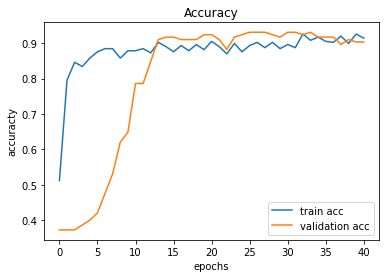

In [29]:
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='validation acc')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracty')
plt.legend()
plt.show()